<a href="https://colab.research.google.com/github/IslamDyshoko/abalone_age/blob/eda/eda_abalone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Abalone Dataset Analysis

## 📋 Описание датасета
Датасет содержит физические измерения морского моллюска, цель анализа — предсказать возраст моллюска на основе его характеристик.

### Структура данных
- **Sex**: Пол моллюска (`M`, `F`, `I` - младенец).
- **Length**: Длина (мм) — наибольшая длина раковины.
- **Diameter**: Диаметр (мм) — перпендикулярен длине.
- **Height**: Высота (мм) — измеряется вместе с мясом внутри раковины.
- **Whole weight**: Общий вес (граммы) — вес моллюска.
- **Shucked weight**: Вес мяса (граммы).
- **Viscera weight**: Вес внутренностей (граммы) — после удаления крови.
- **Shell weight**: Вес раковины (граммы) — после сушки.
- **Rings**: Количество колец (целое число) — прибавив 1.5, можно получить возраст в годах (целевая переменная).


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import polars as pl
%matplotlib inline

In [2]:
data_path = 'https://raw.githubusercontent.com/aiedu-courses/stepik_eda_and_dev_tools/main/datasets/abalone.csv'
df = pd.read_csv(data_path)

In [3]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,NaN,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


#Обработка данных


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4078 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4078 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4127 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


Видим, что в колонках `Diameter`, `Whole weight` и `Shell weight` есть пропуски. Заполним их медианным значением



In [5]:
df['Diameter'].fillna(df['Diameter'].median(),inplace=True)
df['Whole weight'].fillna(df['Whole weight'].median(),inplace=True)
df['Shell weight'].fillna(df['Shell weight'].median(),inplace=True)

<ipython-input-5-dad949ccbc61>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Diameter'].fillna(df['Diameter'].median(),inplace=True)
<ipython-input-5-dad949ccbc61>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [8]:
df.shape

(4177, 9)

In [10]:
df.duplicated().sum()

0

Видим, что в данных нет дубликатов, поэтому перейдем к разведочному анализу.

#Анализ данных

In [28]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.408246,0.139516,0.826623,0.359367,0.180594,0.239023,9.933684
std,0.120093,0.098137,0.041827,0.484521,0.221963,0.109614,0.138108,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.447500,0.186000,0.093500,0.131500,8.000000
50%,0.545000,0.425000,0.140000,0.798500,0.336000,0.171000,0.235000,9.000000
75%,0.615000,0.480000,0.165000,1.141500,0.502000,0.253000,0.325000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


У столбцов `Height`, `Whole weight` ,`Shucked weight` и `Shell weight` очень сильное отличие максимального значения от 75 процентиля, скорее всего это выброс.

<Axes: xlabel='Sex', ylabel='Count'>

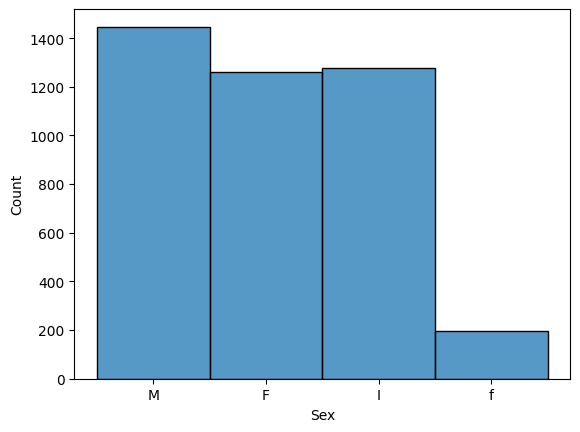

In [11]:
sns.histplot(data=df,x='Sex')

У нас ошибка в данных, скорее всего значение `f` должно было быть `F`. Заменим его

In [12]:
df['Sex'] = df['Sex'].replace('f','F')

<Axes: xlabel='Sex', ylabel='Count'>

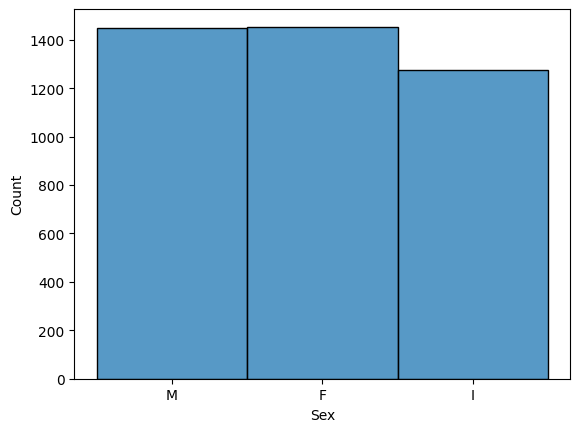

In [22]:
sns.histplot(data=df,x='Sex')

<Axes: xlabel='Sex', ylabel='Rings'>

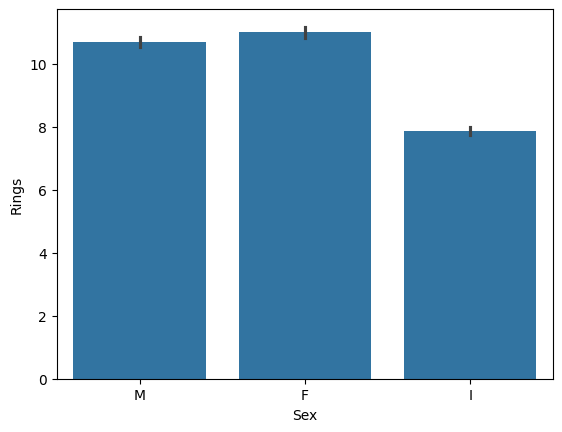

In [23]:
sns.barplot(data=df,x='Sex',y='Rings')

Видим, что возраст особей женского пола в среднем чуть больше, чем у мужчин. Также возраст младенца меньше, чем у остальных категории, что в принципе логично.

<Axes: xlabel='Length', ylabel='Count'>

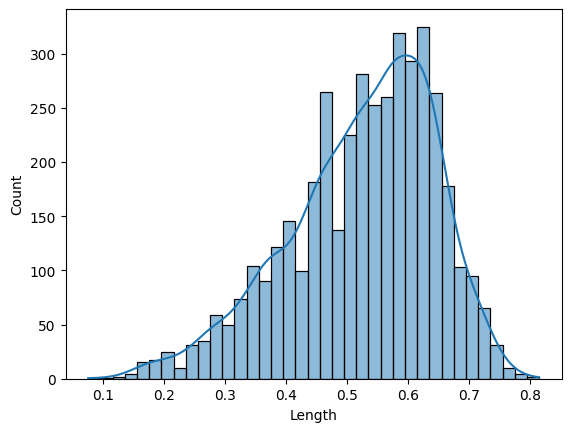

In [25]:
sns.histplot(data=df,x='Length',kde=True)

На графике `Length` видно левостороннюю асимметрию. Большенство данных расположено между 0.45 и 0.7

<Axes: xlabel='Length', ylabel='Rings'>

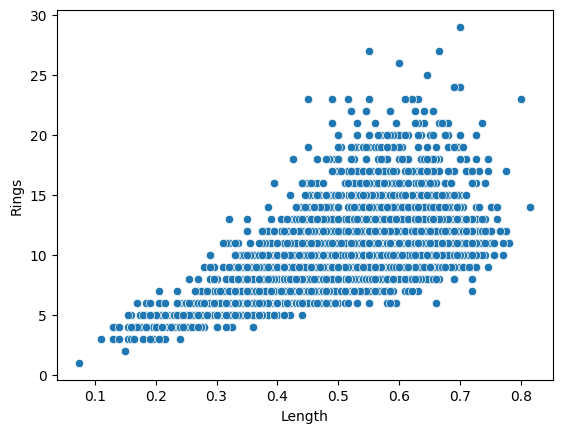

In [36]:
sns.scatterplot(data=df,x='Length',y='Rings')

Видим некоторую монотонную взаимосвязь между Length и Rings, но нельзя сказать, что она линейная

<Axes: xlabel='Diameter', ylabel='Count'>

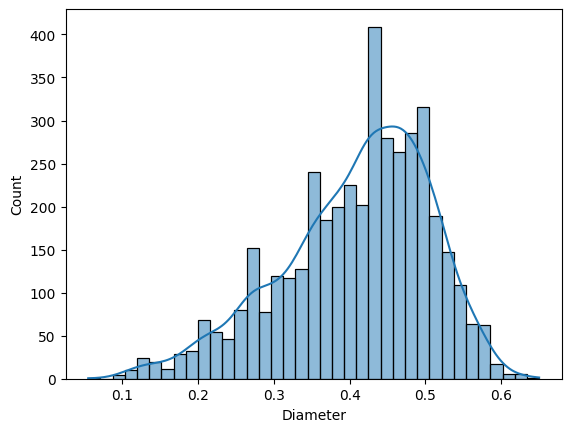

In [27]:
sns.histplot(data=df,x='Diameter',kde=True)

Для `Diameter` также видим скос влево. Большенство данных расположено между 0.35 и 0.55

<Axes: xlabel='Diameter', ylabel='Rings'>

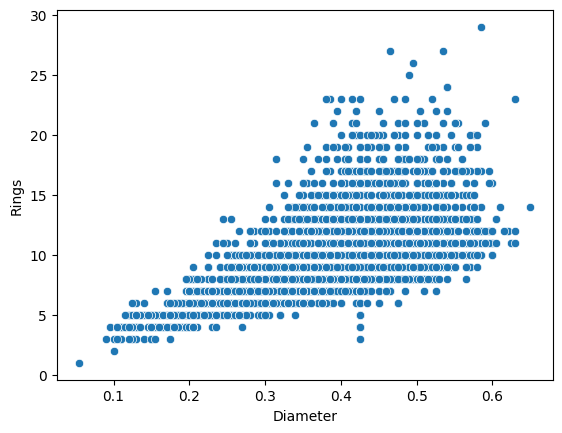

In [37]:
sns.scatterplot(data=df,x='Diameter',y='Rings')

Про взаимосвязь между Diameter и Rings можно сказать тоже самое, что и про Length

<Axes: xlabel='Height', ylabel='Count'>

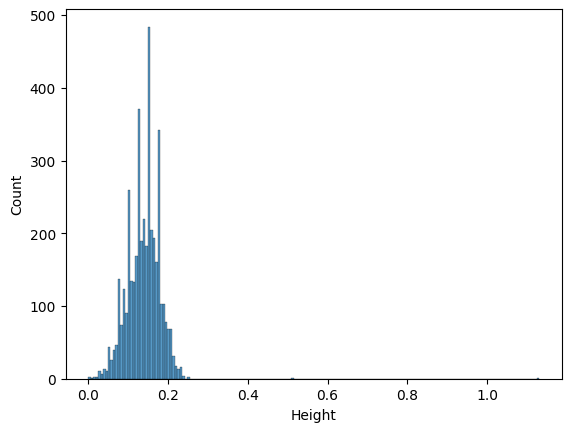

In [31]:
sns.histplot(data=df,x='Height')

На графике видно, что столбец `Height` распределен между 0 и 0.3, кроме 2 значении больших 0.5, скорее всего это ошибка в данных, потом решим, что с ними делать.

<Axes: xlabel='Height', ylabel='Rings'>

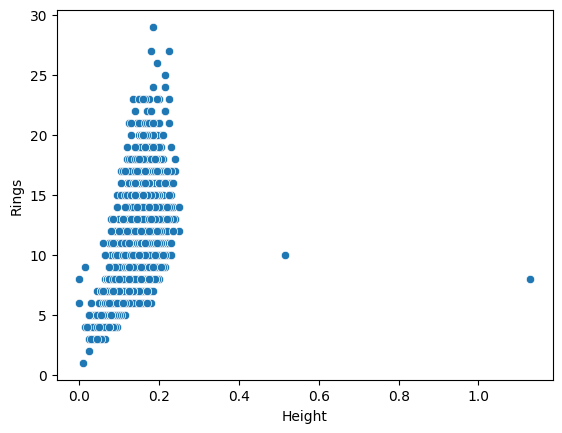

In [38]:
sns.scatterplot(data=df,x='Height',y='Rings')

Если не учитывать два сильных выборса которые у нас есть, то взаймосвязь впринципе прямая монотонная.

<Axes: xlabel='Whole weight', ylabel='Count'>

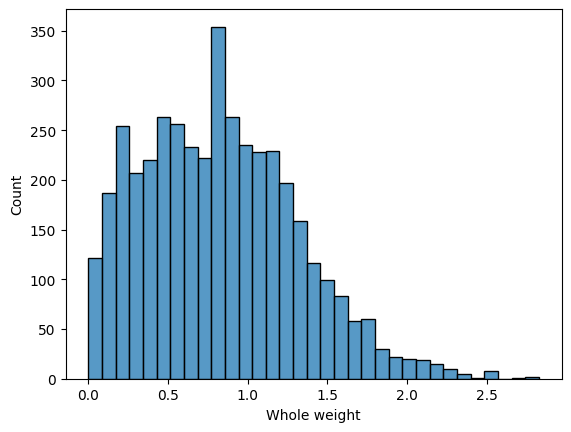

In [32]:
sns.histplot(data = df,x = 'Whole weight')

<Axes: xlabel='Whole weight', ylabel='Rings'>

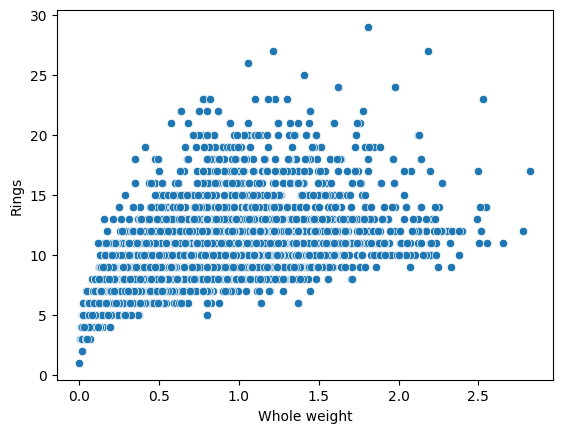

In [39]:
sns.scatterplot(data=df,x='Whole weight',y='Rings')

<Axes: xlabel='Shucked weight', ylabel='Count'>

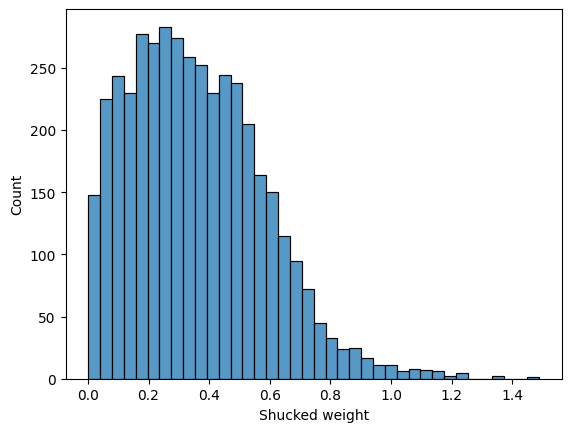

In [33]:
sns.histplot(data = df,x = 'Shucked weight')

<Axes: xlabel='Shucked weight', ylabel='Rings'>

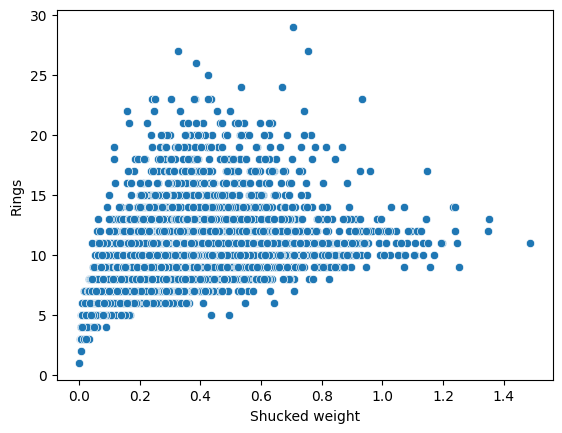

In [40]:
sns.scatterplot(data=df,x='Shucked weight',y='Rings')

<Axes: xlabel='Viscera weight', ylabel='Count'>

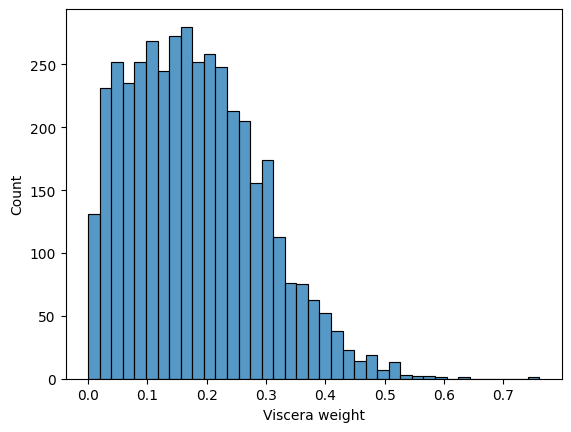

In [34]:
sns.histplot(data = df,x = 'Viscera weight')

<Axes: xlabel='Viscera weight', ylabel='Rings'>

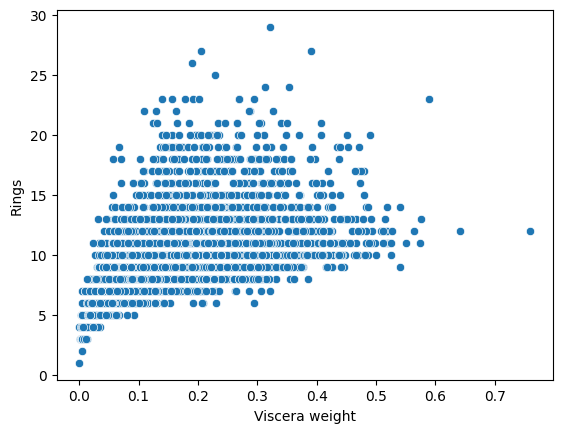

In [41]:
sns.scatterplot(data=df,x='Viscera weight',y='Rings')

<Axes: xlabel='Shell weight', ylabel='Count'>

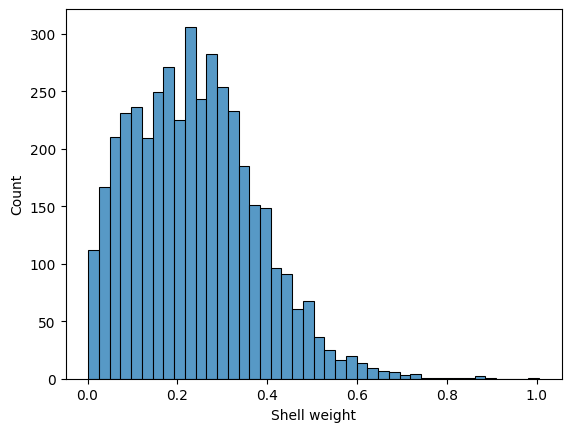

In [35]:
sns.histplot(data = df,x = 'Shell weight')

<Axes: xlabel='Shell weight', ylabel='Rings'>

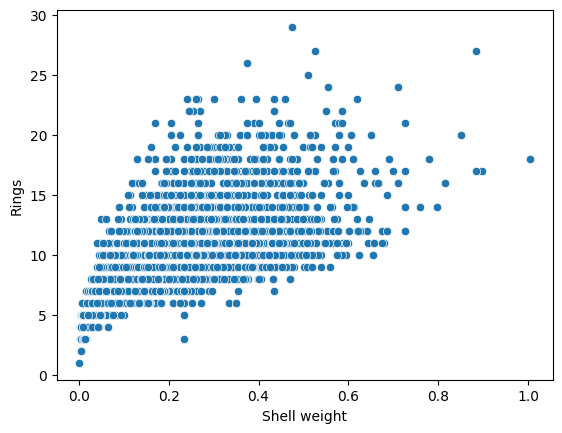

In [42]:
sns.scatterplot(data=df,x='Shell weight',y='Rings')

Все четыре последних графика имеют правосторнюю асимметрию, их схожесть в принципе логична, учитывая то, что они все показывают вес частей моллюска. Их выбросы не настолько отличаются от остальных наблюдении в отличии от столбца Height. Взаймосвязь этих графиков с возрастом, примерно одинакова.

Давайте уберем два выброса в столбце Height

In [44]:
df=df[df['Height']<0.5]

#Корреляция

<Axes: >

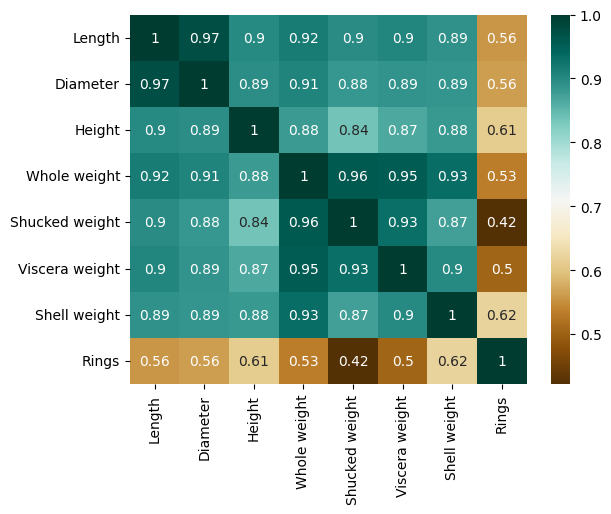

In [45]:
corr = df.corr(numeric_only=True)
sns.heatmap(data=corr, cmap='BrBG', annot=True)

У нас сильная мультиколленеарность между переменными, что плохо. А вот целевая переменная особо сильно ни с кем не коррелирует.

Посмотрим есть ли связь между полом и возрастом. Будем использовать ANOVA

In [69]:
from scipy.stats import f_oneway

CategoryGroupLists = df.groupby('Sex')['Rings'].apply(list)
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

P-Value for Anova is:  1.9731233314074032e-182


In [70]:
if AnovaResults[1]>0.05:
  print("Пол моллюсков не имеет связи с возрастом")
else:
  print("Пол моллюсокв имеет связь с возрастом")

Пол моллюсокв имеет связь с возрастом


#Распределение целевой переменной

<Axes: xlabel='Rings', ylabel='Count'>

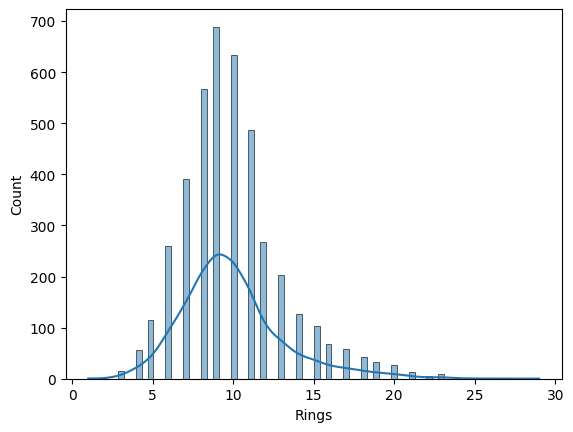

In [52]:
sns.histplot(data=df,x='Rings', kde=True)

Можно предположить, что распределение Гауссово. Проверим это с помощью тест Шапиро-Уилка с уровнем значимости 0.05

In [67]:
from scipy.stats import shapiro

shapiro_test = shapiro(df['Rings'])
if shapiro_test.pvalue > 0.05:
  print("Возраст распределен нормально")
else:
  print("Распеределение возраста маллюсков не Гауссово")

print(shapiro_test.pvalue)

Распеределение возраста маллюсков не Гауссово
3.4050163240790002e-40


<Axes: xlabel='Rings'>

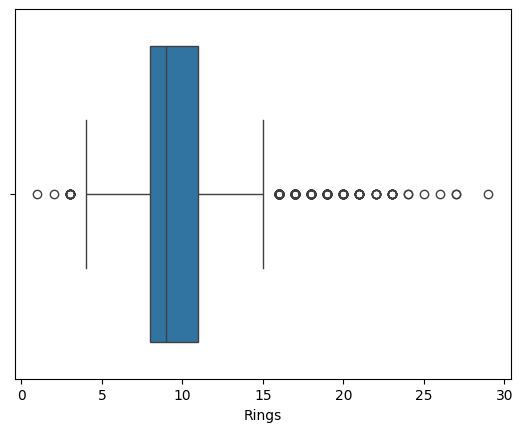

In [59]:
sns.boxplot(data=df,x = 'Rings')

Видно много выбросов в правой части распеределения, это может помешать, т.к. мы будем прогнозировать именно `Rings`

#Сравнение pandas и polars

In [74]:
big_df = df.copy()
for _ in range(400):
  big_df = pd.concat([big_df,df])

big_df.shape

(1674175, 9)

In [75]:
big_df.to_csv('abalone_big.csv',index=False)

In [76]:
%%time
df_pd = pd.read_csv('abalone_big.csv')

CPU times: user 1.44 s, sys: 320 ms, total: 1.76 s
Wall time: 1.86 s


In [77]:
%%time
df_pl = pl.read_csv('abalone_big.csv')

CPU times: user 1.18 s, sys: 284 ms, total: 1.46 s
Wall time: 986 ms


Polars быстрее Pandas в загрузке данных

In [82]:
%%time
df_pd[df_pd['Rings']<10]

CPU times: user 51.8 ms, sys: 32 ms, total: 83.8 ms
Wall time: 89.1 ms


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1650,9
...,...,...,...,...,...,...,...,...,...
1674163,I,0.405,0.300,0.085,0.3035,0.1500,0.0505,0.0880,7
1674165,M,0.500,0.380,0.125,0.5770,0.2690,0.1265,0.1535,9
1674166,F,0.515,0.400,0.125,0.6150,0.2865,0.1230,0.1765,8
1674169,M,0.560,0.430,0.155,0.8675,0.4000,0.1720,0.2290,8


In [83]:
%%time
df_pl.filter(pl.col('Rings')<10)

CPU times: user 33.5 ms, sys: 88.1 ms, total: 122 ms
Wall time: 91.9 ms


Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
str,f64,f64,f64,f64,f64,f64,f64,i64
"""M""",0.35,0.265,0.09,0.2255,0.0995,0.0485,0.07,7
"""F""",0.53,0.42,0.135,0.677,0.2565,0.1415,0.21,9
"""I""",0.33,0.255,0.08,0.205,0.0895,0.0395,0.055,7
"""I""",0.425,0.3,0.095,0.3515,0.141,0.0775,0.12,8
"""M""",0.475,0.37,0.125,0.5095,0.2165,0.1125,0.165,9
…,…,…,…,…,…,…,…,…
"""I""",0.405,0.3,0.085,0.3035,0.15,0.0505,0.088,7
"""M""",0.5,0.38,0.125,0.577,0.269,0.1265,0.1535,9
"""F""",0.515,0.4,0.125,0.615,0.2865,0.123,0.1765,8


В фильтрации примерное равенство.

In [89]:
%%time
df_pd.groupby('Sex').agg({'Rings':'median',
                          'Length':'mean'})

CPU times: user 148 ms, sys: 43.3 ms, total: 191 ms
Wall time: 191 ms


,Rings,Length
Sex,,
F,10.0,0.573059
I,8.0,0.427273
M,10.0,0.559959


In [88]:
%%time
#eager-запрос
df_pl.group_by('Sex').agg([pl.median('Rings'),pl.mean('Length')])

CPU times: user 126 ms, sys: 140 ms, total: 266 ms
Wall time: 213 ms


Sex,Rings,Length
str,f64,f64
"""F""",10.0,0.573059
"""I""",8.0,0.427273
"""M""",10.0,0.559959


In [90]:
%%time
#lazy-запрос
q = (
    df_pl
    .lazy()
    .group_by('Sex')
    .agg(
        [
            pl.median('Rings'),
            pl.mean('Length')
        ]
    )
)

q.collect()

CPU times: user 131 ms, sys: 79.2 ms, total: 211 ms
Wall time: 138 ms


Sex,Rings,Length
str,f64,f64
"""F""",10.0,0.573059
"""M""",10.0,0.559959
"""I""",8.0,0.427273


Eager-запрос для агрегации polars медленее, чем запрос pandas, lazy - быстрее.